# AAA Project -  Clustering Analysis
### Katharine Cross

In [2]:
# Imports 

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
import seaborn as sns
from scipy.stats import ttest_ind
from matplotlib.axis import XTick

In [3]:
# Import Data

clean_df=pd.read_csv('AAA_Cleaned4.csv')

In [4]:
clean_df.head()

,individual_key,individual_key.1,individual_key.2,age,children,dwelling_type,education,estimated_income_code,marital_status,gender,...,upgrade_membership,consumerview_profitability_score,count_clicks_or_opens,credit_ranges,donor_flag,drv_driving_school_flag,occupation_group,member_tenure_years,member_type,Average_Member_yrcost
0,15294.0,15294.0,15294.0,31.000000,No,Multi Family Dwelling/Apartment,High School,"$15,000-$19,999",Single,M,...,NotOffered,"Fair Profitability, Medium Likelihood to Perform",0.0,7,False,N,Other,7.0,Primary,145.290000
1,16996.0,16996.0,16996.0,21.000000,No,Single Family,Unknown,"$100,000-$149,999",Single,M,...,NotOffered,Unknown,2.0,5,False,N,Other,7.0,Associate,10.456667
2,18708.0,18708.0,18708.0,54.000000,Yes,Single Family,Completed College,"$150,000-$174,999",Single,F,...,NotOffered,"High Profitability, High Likelihood to Perform",0.0,7,False,N,Professional,23.0,Primary,10.000000
3,19350.0,19350.0,19350.0,58.000000,Unknown,Unknown,Unknown,NaN,Unknown,M,...,NotOffered,"High Profitability, High Likelihood to Perform",0.0,4,False,N,Technical,24.0,Associate,148.166667
4,35518.0,35518.0,35518.0,58.478336,Yes,Multi Family Dwelling/Apartment,High School,NaN,Married,M,...,NotOffered,Unknown,0.0,5,False,N,Blue Collar,0.0,Primary,0.000000


In [5]:
clean_df.shape

(10481, 30)

In [6]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10481 entries, 0 to 10480
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   individual_key                    10481 non-null  float64
 1   individual_key.1                  10481 non-null  float64
 2   individual_key.2                  10481 non-null  float64
 3   age                               10481 non-null  float64
 4   children                          10481 non-null  object 
 5   dwelling_type                     10481 non-null  object 
 6   education                         10481 non-null  object 
 7   estimated_income_code             5493 non-null   object 
 8   marital_status                    10481 non-null  object 
 9   gender                            10481 non-null  object 
 10  state                             10481 non-null  object 
 11  race_cleaned                      10481 non-null  object 
 12  city

In [7]:
clean_df.describe()

,individual_key,individual_key.1,individual_key.2,age,accepted,numofoffers,acceptedoffers,count_clicks_or_opens,credit_ranges,member_tenure_years,Average_Member_yrcost
count,1.048100e+04,1.048100e+04,1.048100e+04,10481.000000,10481.000000,10481.000000,10481.000000,10481.000000,10481.000000,10481.000000,10481.000000
mean,8.558575e+07,8.558575e+07,8.558575e+07,58.478336,0.616353,2.114779,0.972522,18.951245,5.170976,11.837420,15.363241
std,1.039753e+08,1.039753e+08,1.039753e+08,10.571742,0.486297,1.157325,0.705897,50.294114,1.480523,11.452861,36.667498
min,1.529400e+04,1.529400e+04,1.529400e+04,19.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1.216586e+07,1.216586e+07,1.216586e+07,58.000000,0.000000,1.000000,1.000000,0.000000,4.000000,3.000000,0.000000
50%,2.572815e+07,2.572815e+07,2.572815e+07,58.000000,1.000000,2.000000,1.000000,0.000000,4.000000,9.000000,0.000000
75%,1.894970e+08,1.894970e+08,1.894970e+08,61.000000,1.000000,3.000000,1.000000,11.000000,7.000000,18.000000,16.333333
max,2.731138e+08,2.731138e+08,2.731138e+08,92.000000,1.000000,4.000000,4.000000,487.000000,8.000000,72.000000,718.830000


### Elbow Curve Method

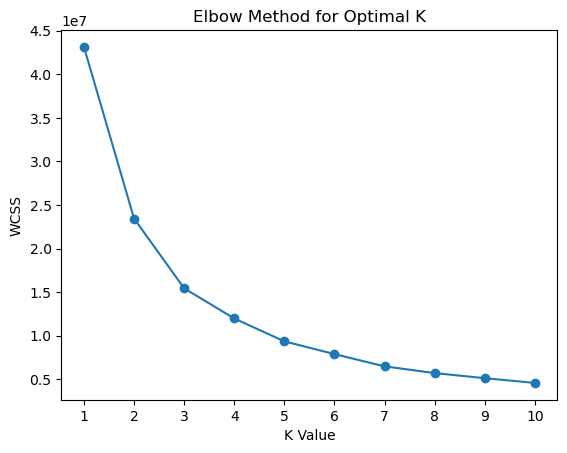

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

X = clean_df[["age", "count_clicks_or_opens", "member_tenure_years", "Average_Member_yrcost"]]

wcss = []

for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.xticks(np.arange(1, 11, 1))
plt.show()


### Silhoutte Score Chart

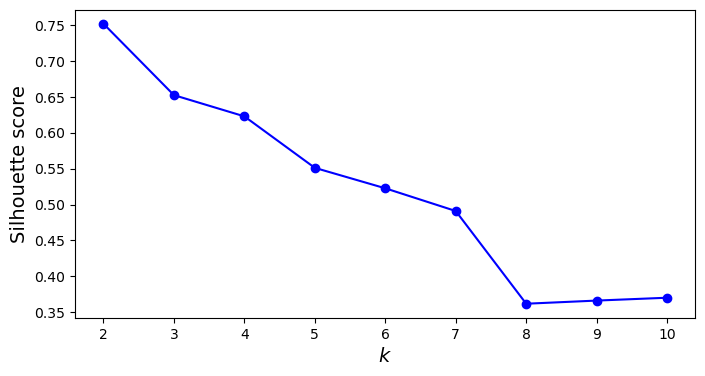

In [26]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 11)]

inertias = [model.inertia_ for model in kmeans_per_k]

silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]     

plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

### K-Means Clustering Analysis

In [27]:
#Taking 2 clusters

km1=KMeans(n_clusters=2)

In [28]:
#Fitting the input data using km1

km1.fit(X)

KMeans(n_clusters=2)

In [29]:
#predicting the labels of the input data

y=km1.predict(X)

In [32]:
#adding the labels to a column named label

clean_df["label"] = y


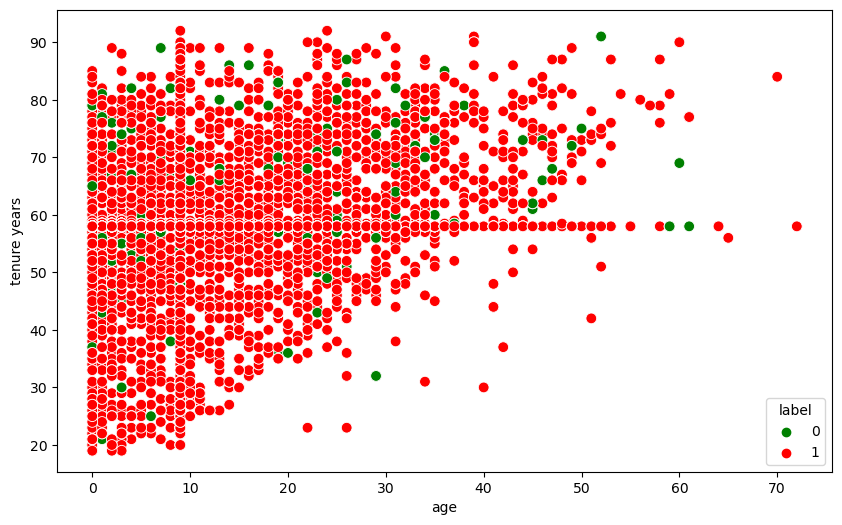

In [35]:
#Scatterplot of the clusters

plt.figure(figsize=(10,6))
sns.scatterplot(x = 'member_tenure_years',y = 'age',hue= "label"  ,  
                 palette=['green','red'], legend='full',data = clean_df  ,s = 60 )

plt.xlabel('age')
plt.ylabel('tenure years') 
plt.show()

# New Clustering Attempt

In [9]:
clean_df.columns

Index(['individual_key', 'individual_key.1', 'individual_key.2', 'age',
       'children', 'dwelling_type', 'education', 'estimated_income_code',
       'marital_status', 'gender', 'state', 'race_cleaned', 'city_cleaned',
       'offer_name', 'accepted', 'numofoffers', 'acceptedoffers',
       'add_associate', 'auto-renew', 'offer_protectmyid',
       'upgrade_membership', 'consumerview_profitability_score',
       'count_clicks_or_opens', 'credit_ranges', 'donor_flag',
       'drv_driving_school_flag', 'occupation_group', 'member_tenure_years',
       'member_type', 'Average_Member_yrcost'],
      dtype='object')

In [10]:
clean_df.dtypes

individual_key                      float64
individual_key.1                    float64
individual_key.2                    float64
age                                 float64
children                             object
dwelling_type                        object
education                            object
estimated_income_code                object
marital_status                       object
gender                               object
state                                object
race_cleaned                         object
city_cleaned                         object
offer_name                           object
accepted                            float64
numofoffers                           int64
acceptedoffers                      float64
add_associate                        object
auto-renew                           object
offer_protectmyid                    object
upgrade_membership                   object
consumerview_profitability_score     object
count_clicks_or_opens           

In [13]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

clean_df=pd.read_csv('AAA_Cleaned4.csv')

# Separate numerical and categorical features
numerical_features = ['age', 'numofoffers', 'count_clicks_or_opens', 'credit_ranges', 'member_tenure_years',
                      'Average_Member_yrcost']
categorical_features = ['children', 'dwelling_type', 'education','marital_status', 'gender', 'state', 
                       'race_cleaned', 'city_cleaned', 'consumerview_profitability_score', 'occupation_group',
                       'member_type']

# Create transformers for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

# Create a column transformer to apply different transformers to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline with preprocessing and clustering
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=3, random_state=42))
])

# Fit the pipeline on the data
pipeline.fit(clean_df)

# Add cluster labels to the original dataset
clean_df['Cluster'] = pipeline.named_steps['kmeans'].labels_

# Display the clustered dataset
print(clean_df)


       individual_key  individual_key.1  individual_key.2        age children  \
0             15294.0           15294.0           15294.0  31.000000       No   
1             16996.0           16996.0           16996.0  21.000000       No   
2             18708.0           18708.0           18708.0  54.000000      Yes   
3             19350.0           19350.0           19350.0  58.000000  Unknown   
4             35518.0           35518.0           35518.0  58.478336      Yes   
...               ...               ...               ...        ...      ...   
10476     273104640.0       273104640.0       273104640.0  58.000000  Unknown   
10477     273106913.0       273106913.0       273106913.0  58.000000  Unknown   
10478     273106913.0       273106913.0       273106913.0  58.000000  Unknown   
10479     273106913.0       273106913.0       273106913.0  58.000000  Unknown   
10480     273113817.0       273113817.0       273113817.0  58.000000  Unknown   

                         dw

In [17]:
# Display the distribution of categorical features within each cluster
for cat_feature in categorical_features:
    cluster_distribution = clean_df.groupby(['Cluster', cat_feature]).size().unstack(fill_value=0)
    cluster_distribution = cluster_distribution.divide(cluster_distribution.sum(axis=1), axis=0)
    print(f"\nCluster Distribution for {cat_feature}:")
    print(cluster_distribution)



Cluster Distribution for children:
children        No   Unknown       Yes
Cluster                               
0         0.177455  0.000000  0.822545
1         0.050532  0.933598  0.015870
2         0.386485  0.000000  0.613515

Cluster Distribution for dwelling_type:
dwelling_type  Multi Family Dwelling/Apartment    PO Box  Single Family  \
Cluster                                                                   
0                                     0.156622  0.010045       0.833333   
1                                     0.025684  0.008561       0.032157   
2                                     0.171438  0.027963       0.800599   

dwelling_type   Unknown  
Cluster                  
0              0.000000  
1              0.933598  
2              0.000000  

Cluster Distribution for education:
education  Completed College  Graduate School  High School  Some College  \
Cluster                                                                    
0                   0.072173     

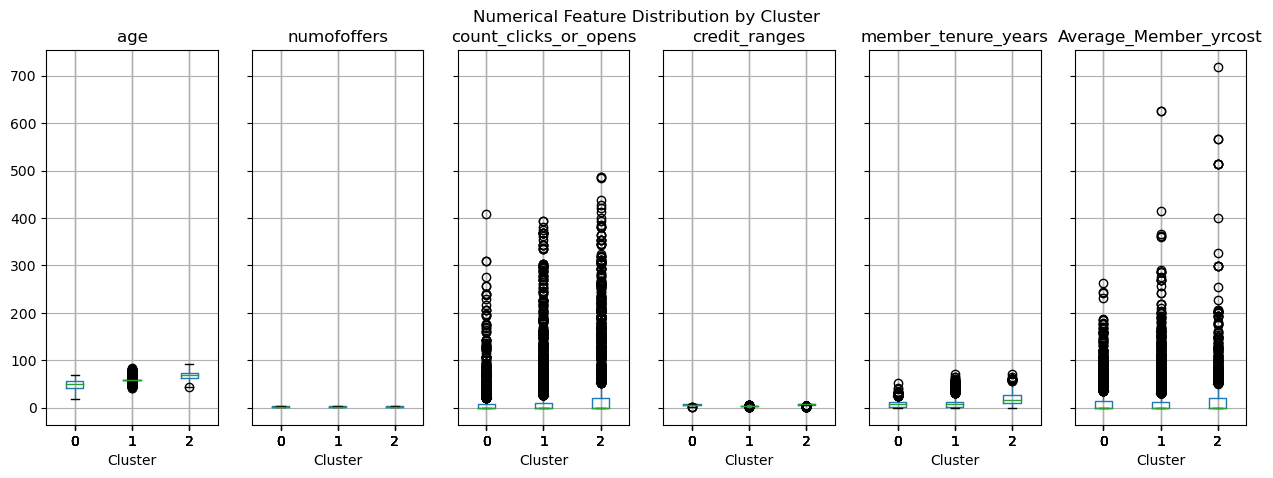

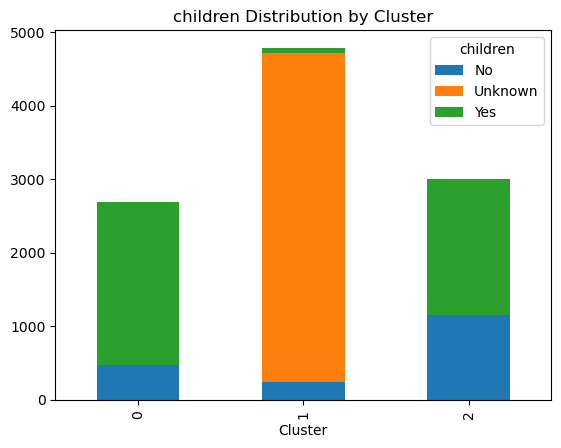

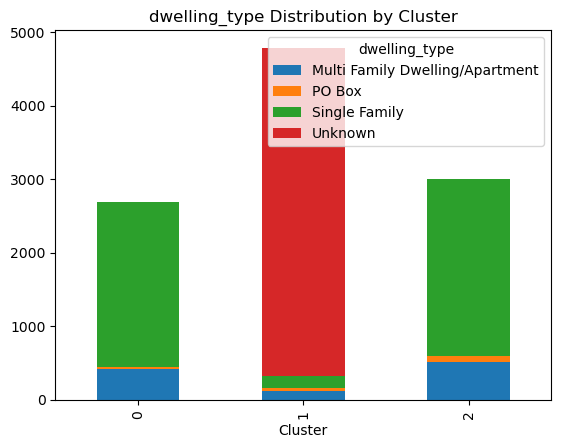

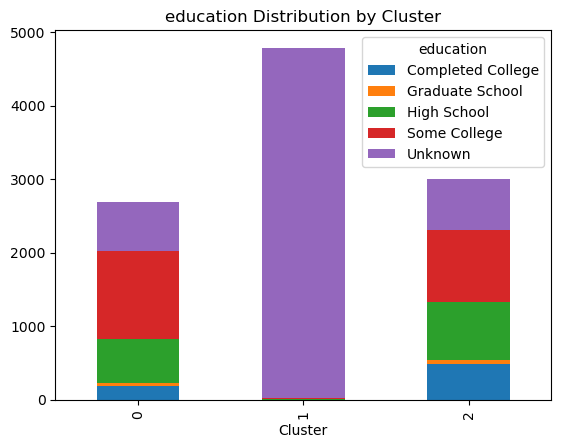

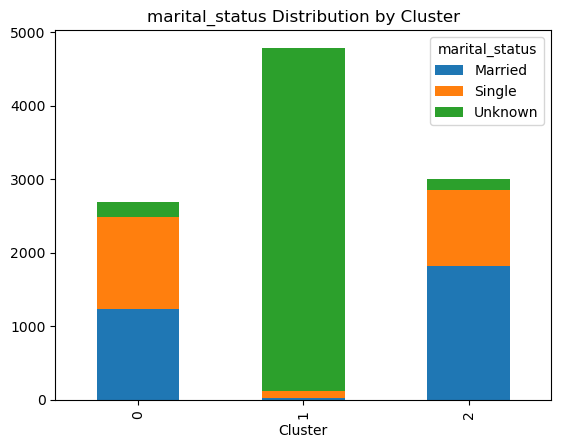

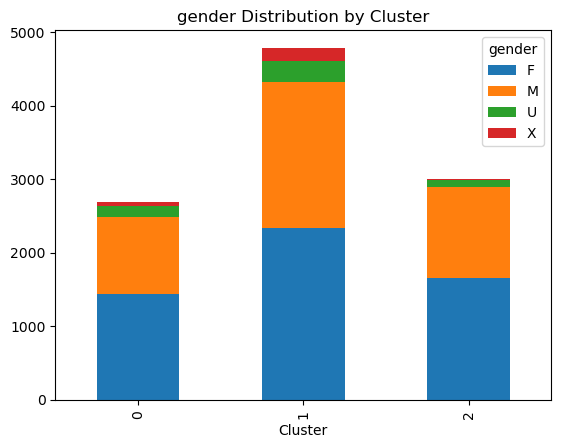

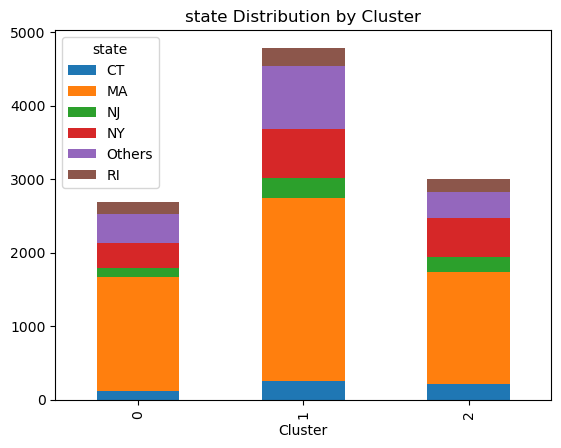

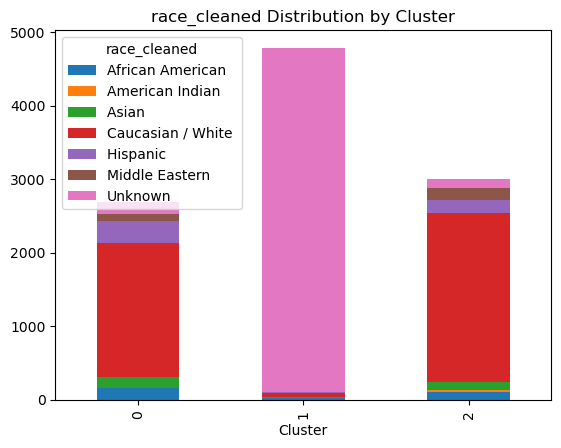

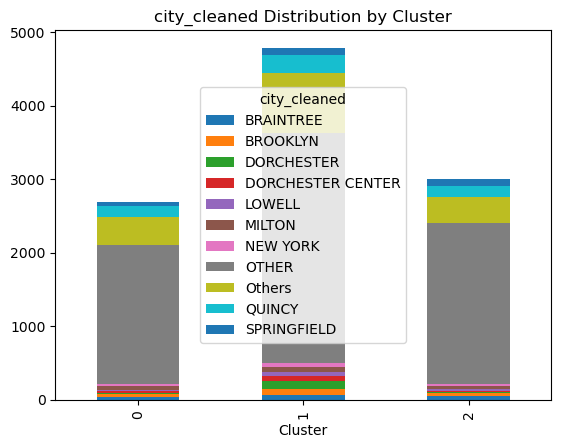

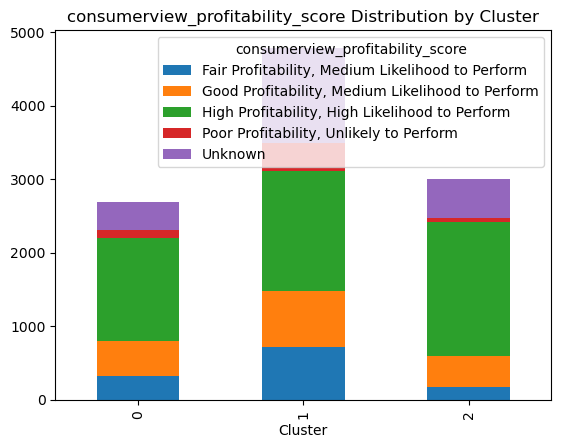

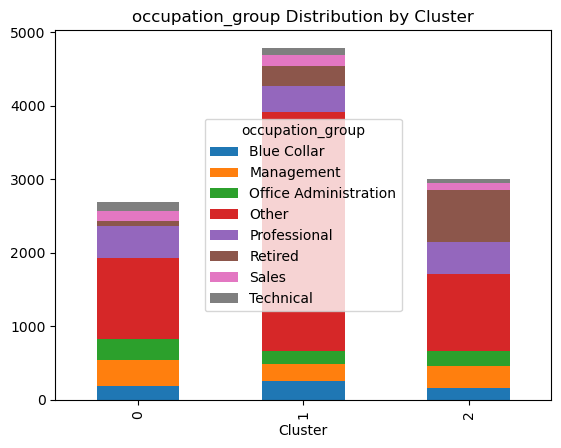

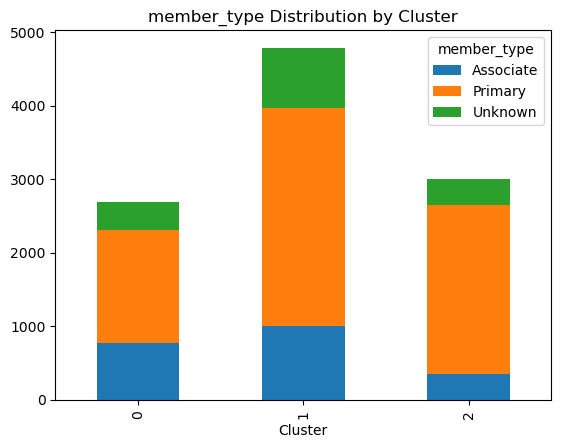

In [18]:
# Visualization of numerical features
clean_df.boxplot(by='Cluster', column=numerical_features, layout=(1, len(numerical_features)), figsize=(15, 5))
plt.suptitle("Numerical Feature Distribution by Cluster")
plt.show()

# Visualization of categorical features
for cat_feature in categorical_features:
    pd.crosstab(clean_df['Cluster'], clean_df[cat_feature]).plot(kind='bar', stacked=True)
    plt.title(f"{cat_feature} Distribution by Cluster")
    plt.show()


In [19]:
clean_df.columns

Index(['individual_key', 'individual_key.1', 'individual_key.2', 'age',
       'children', 'dwelling_type', 'education', 'estimated_income_code',
       'marital_status', 'gender', 'state', 'race_cleaned', 'city_cleaned',
       'offer_name', 'accepted', 'numofoffers', 'acceptedoffers',
       'add_associate', 'auto-renew', 'offer_protectmyid',
       'upgrade_membership', 'consumerview_profitability_score',
       'count_clicks_or_opens', 'credit_ranges', 'donor_flag',
       'drv_driving_school_flag', 'occupation_group', 'member_tenure_years',
       'member_type', 'Average_Member_yrcost', 'Cluster'],
      dtype='object')

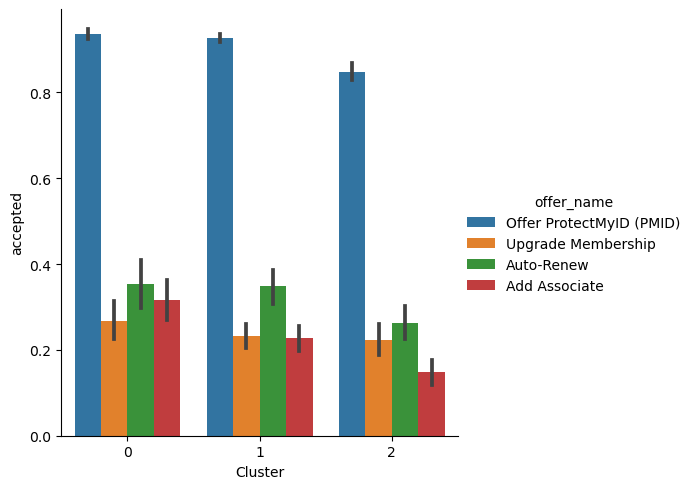

In [22]:
sns.catplot(x='Cluster', y='accepted', hue='offer_name', kind='bar', data=clean_df)

In [26]:
import pandas as pd
import seaborn as sns

# Assuming clean_df is your DataFrame with columns 'Cluster', 'accepted', 'offer_name'

# Display counts for each combination of 'Cluster', 'accepted', and 'offer_name'
table = clean_df.groupby(['Cluster', 'accepted', 'offer_name']).size().reset_index(name='Count')

print("Table of Counts:")
print(table)


Table of Counts:
    Cluster  accepted                offer_name  Count
0         0       0.0             Add Associate    262
1         0       0.0                Auto-Renew    184
2         0       0.0  Offer ProtectMyID (PMID)    106
3         0       0.0        Upgrade Membership    276
4         0       1.0             Add Associate    121
5         0       1.0                Auto-Renew    101
6         0       1.0  Offer ProtectMyID (PMID)   1537
7         0       1.0        Upgrade Membership    101
8         1       0.0             Add Associate    588
9         1       0.0                Auto-Renew    387
10        1       0.0  Offer ProtectMyID (PMID)    196
11        1       0.0        Upgrade Membership    559
12        1       1.0             Add Associate    173
13        1       1.0                Auto-Renew    207
14        1       1.0  Offer ProtectMyID (PMID)   2510
15        1       1.0        Upgrade Membership    169
16        2       0.0             Add Associate 

### Breakdown of Acceptances by Cluster:

#### Cluster 0 :


Auto-Renew: 36% accepted

Protect My ID: 94% accepted

Upgrade Membership: 27% accepted

#### Cluster 1:

Auto-Renew: 35% accepted

Protect My ID: 93% accepted

Upgrade Membership: 23% accepted


#### Cluster 2:

Auto-Renew: 26% accepted

Protect My ID: 85% accepted

Upgrade Membership: 22% accepted